In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [43]:
# Leer datos de Teleférico de Madrid entre 2018 y 2019 obtenidos de ayto de Madrid 
telef = pd.read_csv('201909_Usuarios_Teleferico.csv',encoding = 'iso-8859-1',delimiter = ';', parse_dates=['Fecha'], dayfirst=False)
telef.tail()

,Fecha,Cod_billete,Des_billete,Num_users
3407,2019-03-31,33,C joven ida y vuelta,24
3408,2019-03-31,39,Monumento grande,1
3409,2019-03-31,128,pareo,1
3410,2019-03-31,130,Family Check Ida y vuelta,43
3411,2019-03-31,131,Urban check Ida y vuelta,14


In [44]:
# Sumar los usuarios de todos los distintos tipos de billete de cada día
telef = telef.groupby(['Fecha'])['Num_users'].sum().reset_index()
telef['day-of-week'] = telef['Fecha'].dt.dayofweek
telef.head()

,Fecha,Num_users,day-of-week
0,2018-03-25,1424,6
1,2018-03-26,1643,0
2,2018-03-27,1930,1
3,2018-03-28,2149,2
4,2018-03-29,2444,3


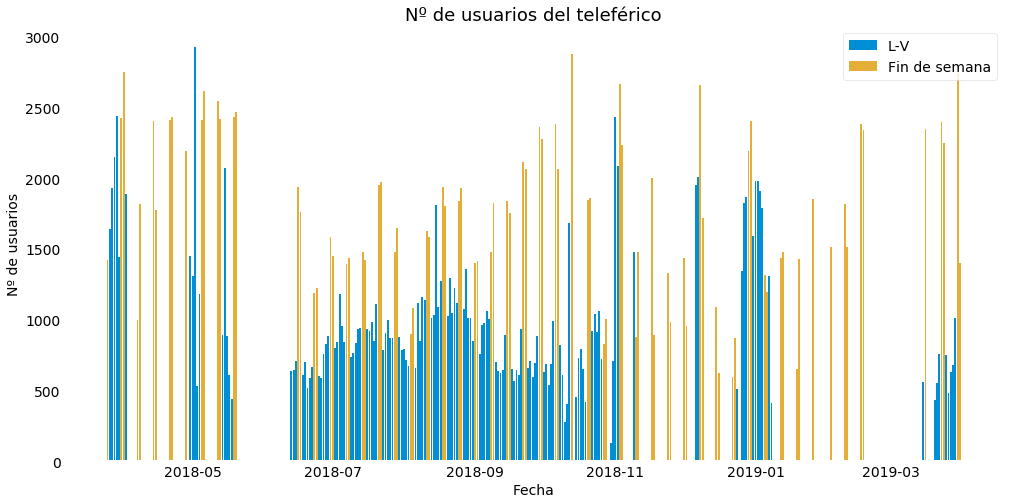

In [45]:
# Comparar usuarios de diario con los de fin de semana
telef_sem = telef[telef['day-of-week'] <= 4]
telef_finde = telef[telef['day-of-week'] > 4]


plt.bar(telef_sem['Fecha'],telef_sem['Num_users'], color=sns.color_palette()[0],label = 'L-V')
plt.bar(telef_finde['Fecha'],telef_finde['Num_users'], color=sns.color_palette()[2],label = 'Fin de semana')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Nº de usuarios')

plt.title('Nº de usuarios del teleférico',fontsize= 18)
plt.savefig('images/usuarios_fecha.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

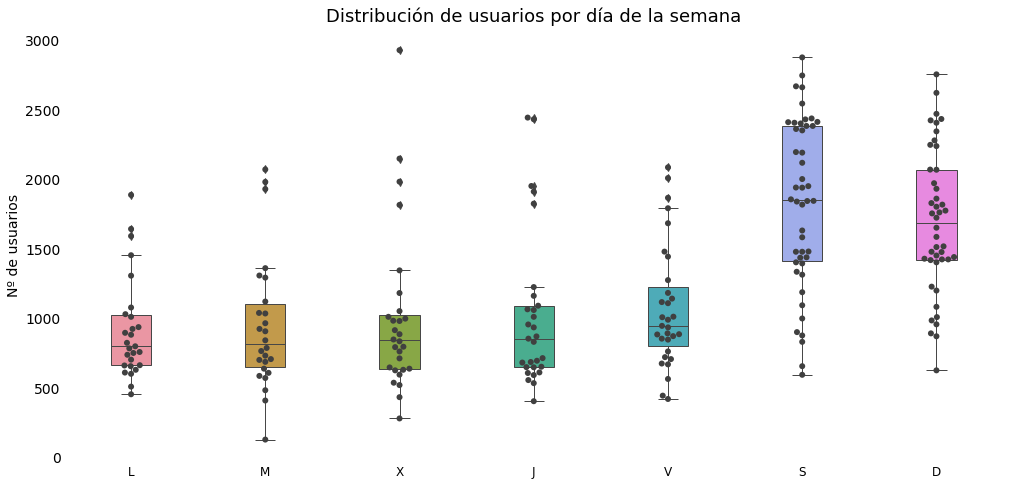

In [46]:
dias = ['L','M','X','J','V','S','D']
plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.boxplot(x='day-of-week',y='Num_users', data=telef, linewidth=1,width = 0.3)
sns.swarmplot(x='day-of-week',y='Num_users', data=telef ,size = 6, color='0.25')
ax.set_xticklabels(dias, rotation = 0, va='top',fontsize= 12 )
ax.set_ylabel('Nº de usuarios')    
ax.set_xlabel('')
ax.set_title('Distribución de usuarios por día de la semana',fontsize= 18)
plt.savefig('images/usarios_semana.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [47]:
# Leer datos de temperaturas de Madrid entre 2018 y 2019 obtenidos de NOAA 
temp = pd.read_csv('1813234.csv',encoding = 'iso-8859-1',delimiter = ',',parse_dates=['DATE'])
temp.head()

,STATION,NAME,DATE,PRCP,TMAX
0,SPE00120296,"MADRID GETAFE, SP",2018-01-01,0.00,51.0
1,SPE00120296,"MADRID GETAFE, SP",2018-01-02,0.00,53.0
2,SPE00120296,"MADRID GETAFE, SP",2018-01-03,0.00,54.0
3,SPE00120296,"MADRID GETAFE, SP",2018-01-04,0.00,57.0
4,SPE00120296,"MADRID GETAFE, SP",2018-01-05,0.44,53.0


In [48]:
temp = temp[temp['STATION']=='SPE00120296']
telef_finde = pd.merge(telef_finde, temp, how='left', left_on='Fecha', right_on='DATE')
telef_finde['tmax_c'] = (telef_finde['TMAX'] - 32) / 1.8
telef_finde

,Fecha,Num_users,day-of-week,STATION,NAME,DATE,PRCP,TMAX,tmax_c
0,2018-03-25,1424,6,SPE00120296,"MADRID GETAFE, SP",2018-03-25,0.00,58.0,14.444444
1,2018-03-31,2431,5,SPE00120296,"MADRID GETAFE, SP",2018-03-31,0.00,58.0,14.444444
2,2018-04-01,2755,6,SPE00120296,"MADRID GETAFE, SP",2018-04-01,0.00,65.0,18.333333
3,2018-04-07,999,5,SPE00120296,"MADRID GETAFE, SP",2018-04-07,0.11,53.0,11.666667
4,2018-04-08,1818,6,SPE00120296,"MADRID GETAFE, SP",2018-04-08,0.28,57.0,13.888889
5,2018-04-14,2407,5,SPE00120296,"MADRID GETAFE, SP",2018-04-14,0.00,63.0,17.222222
6,2018-04-15,1775,6,SPE00120296,"MADRID GETAFE, SP",2018-04-15,0.35,62.0,16.666667
7,2018-04-21,2411,5,SPE00120296,"MADRID GETAFE, SP",2018-04-21,0.00,69.0,20.555556
8,2018-04-22,2434,6,SPE00120296,"MADRID GETAFE, SP",2018-04-22,0.00,74.0,23.333333
9,2018-04-28,2192,5,SPE00120296,"MADRID GETAFE, SP",2018-04-28,0.19,65.0,18.333333


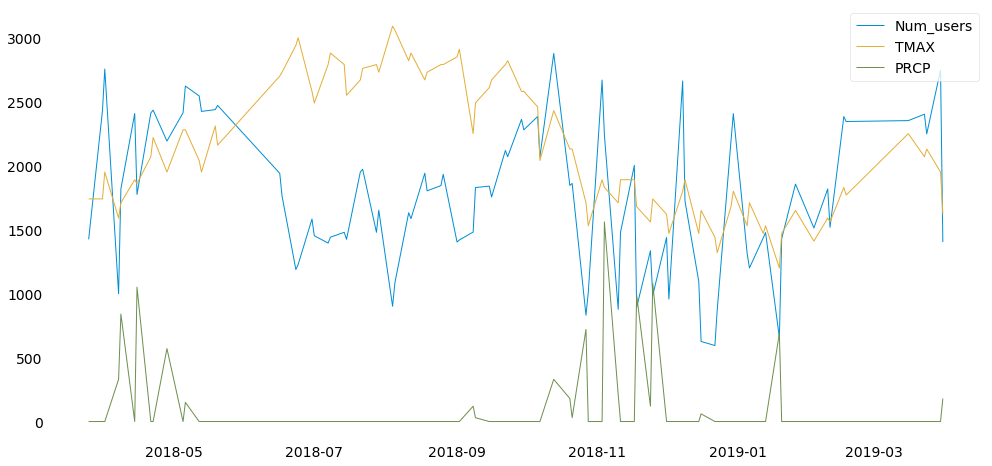

In [49]:
plt.plot(telef_finde['Fecha'],telef_finde['Num_users'], lw=1, ls='-', alpha=1, color=sns.color_palette()[0])
plt.plot(telef_finde['Fecha'],telef_finde['TMAX']*30, lw=1, ls='-', alpha=1, color=sns.color_palette()[2])
plt.plot(telef_finde['Fecha'],telef_finde['PRCP']*3000, lw=1, ls='-', alpha=1, color=sns.color_palette()[3])

plt.legend()

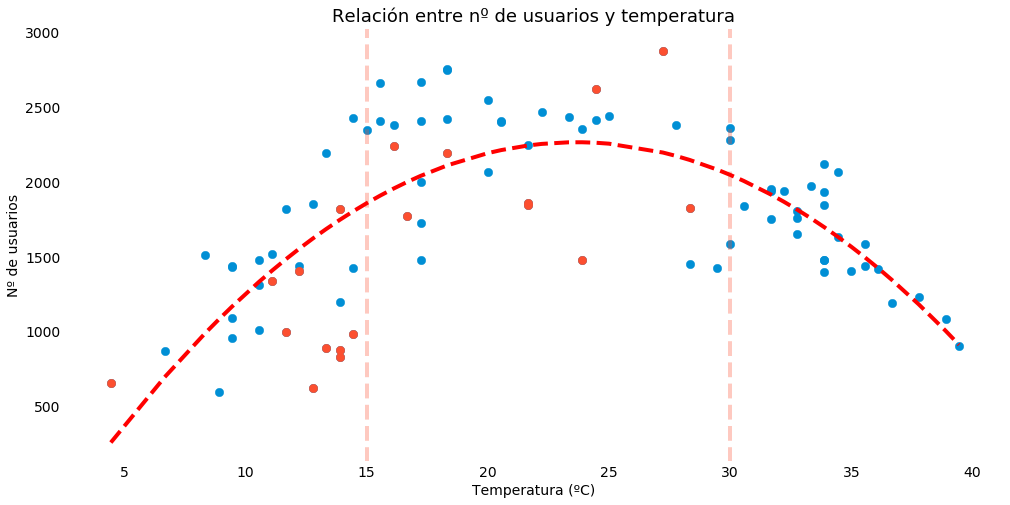

In [50]:
# Correlacion entre Viajes y Temp

# Pintar zona de mayor nº de usuarios
plt.axvline(x=15, ls='--', alpha=0.3, color=sns.color_palette()[1])
plt.axvline(x=30, ls='--', alpha=0.3, color=sns.color_palette()[1])
#plt.axvspan(12, 31, ymin=0.7, ymax=1, alpha=0.3, color=sns.color_palette()[2])

# Todos los puntos
x = telef_finde['tmax_c']
y = telef_finde['Num_users']
plt.scatter(x, y , color = sns.color_palette()[0], marker = 'o', s = 70)

# Sólo los días de lluvia
telef_finde_lluvia= telef_finde[telef_finde['PRCP'] > 0]
x2 = telef_finde_lluvia['tmax_c']
y2 = telef_finde_lluvia['Num_users']
plt.scatter(x2, y2 , color = sns.color_palette()[1],marker = 'o', s = 70)

# Curva de regresión de 2º grado
z = np.polyfit(x,y, 2)
p = np.poly1d(z)
xs = np.sort(x)
plt.plot(xs,p(xs),"r--")

#plt.legend()
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Nº de usuarios')

plt.title('Relación entre nº de usuarios y temperatura',fontsize= 18)
plt.savefig('images/usuarios_temp.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()


In [51]:
telef_finde[(telef_finde['PRCP'] > 0) & (telef_finde['tmax_c'] >12)]

,Fecha,Num_users,day-of-week,STATION,NAME,DATE,PRCP,TMAX,tmax_c
4,2018-04-08,1818,6,SPE00120296,"MADRID GETAFE, SP",2018-04-08,0.28,57.0,13.888889
6,2018-04-15,1775,6,SPE00120296,"MADRID GETAFE, SP",2018-04-15,0.35,62.0,16.666667
9,2018-04-28,2192,5,SPE00120296,"MADRID GETAFE, SP",2018-04-28,0.19,65.0,18.333333
11,2018-05-06,2622,6,SPE00120296,"MADRID GETAFE, SP",2018-05-06,0.05,76.0,24.444444
40,2018-09-08,1481,5,SPE00120296,"MADRID GETAFE, SP",2018-09-08,0.04,75.0,23.888889
41,2018-09-09,1829,6,SPE00120296,"MADRID GETAFE, SP",2018-09-09,0.01,83.0,28.333333
50,2018-10-13,2877,5,SPE00120296,"MADRID GETAFE, SP",2018-10-13,0.11,81.0,27.222222
51,2018-10-20,1845,5,SPE00120296,"MADRID GETAFE, SP",2018-10-20,0.06,71.0,21.666667
52,2018-10-21,1861,6,SPE00120296,"MADRID GETAFE, SP",2018-10-21,0.01,71.0,21.666667
53,2018-10-27,831,5,SPE00120296,"MADRID GETAFE, SP",2018-10-27,0.24,57.0,13.888889
